In [307]:
#import library in python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
#import scaling library
from sklearn.preprocessing import StandardScaler

In [309]:
#Import KMeans cluster library
from sklearn.cluster import KMeans

In [310]:
#Import hierarchical cluster library
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

In [311]:
#import data file using pandas library pd.read_csv()
country=pd.read_csv("Country-data.csv")

In [312]:
#read data file
country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [313]:
name=pd.DataFrame(country['country'])

In [314]:
#check data type of file
country.info()
#We can see that expect country columns, all other columns are numeric data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [315]:
#check null values
country.isnull().sum()
#so we can see that there is no null values and data file is clean

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [316]:
country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [317]:
#remove outliers
country.describe(percentiles=[0.25,0.50,0.60,0.75,0.95])
# we can see exports, health,imports,income have most outliers

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
60%     29.160000   40.160000    7.036000   49.160000   14980.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
95%    116.000000   80.570000   11.570000   81.140000   48290.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
60%      6.964000   74.560000    2.670000    7334.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [318]:
print(country.quantile(0.25))
print("\n")
print(country.quantile(0.75))

child_mort       8.250
exports         23.800
health           4.920
imports         30.200
income        3355.000
inflation        1.810
life_expec      65.300
total_fer        1.795
gdpp          1330.000
Name: 0.25, dtype: float64


child_mort       62.10
exports          51.35
health            8.60
imports          58.75
income        22800.00
inflation        10.75
life_expec       76.80
total_fer         3.88
gdpp          14050.00
Name: 0.75, dtype: float64


In [319]:
country1=country

In [320]:
#country1=country1.drop(['country'],axis=1,inplace=True)

In [321]:
country1.drop(['country'],axis=1,inplace=True)

In [322]:
country1.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

In [323]:
len(country1)

167

In [324]:
country1.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

In [325]:
country1.describe(percentiles=[.25,.5,.75,.90,.95,.99])
#We can see lots of outliers specially post 95 percentile.
#So, we can remove data beyond 95 percentile

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
90%    100.220000   70.800000   10.940000   75.420000   41220.000000   
95%    116.000000   80.570000   11.570000   81.140000   48290.000000   
99%    153.400000  160.480000   13.474000  146.080000   84374.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [326]:
Q1 = country1.quantile(0.25)
Q3 = country1.quantile(0.95)
IQR = Q3 - Q1
IQR


child_mort      107.750
exports          56.770
health            6.650
imports          50.940
income        44935.000
inflation        19.060
life_expec       16.100
total_fer         4.066
gdpp          47280.000
dtype: float64

In [327]:
country1.shape

(167, 9)

In [328]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country1_norm1 = standard_scaler.fit_transform(country1)

# PCA on the data

In [329]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=50)

In [330]:
#Doing the PCA on the train data
pca.fit(country1_norm1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
  svd_solver='randomized', tol=0.0, whiten=False)

In [331]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [332]:
colnames = list(country.columns)
pcs_df = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4], })
pcs_df.head()

Feature       PC1       PC2       PC3       PC4       PC5
0  child_mort -0.419519  0.192884 -0.029544  0.370653 -0.168970
1     exports  0.283897  0.613163  0.144761  0.003091  0.057616
2      health  0.150838 -0.243087 -0.596632  0.461897  0.518000
3     imports  0.161482  0.671821 -0.299927 -0.071907  0.255376
4      income  0.398441  0.022536  0.301548  0.392159 -0.247150

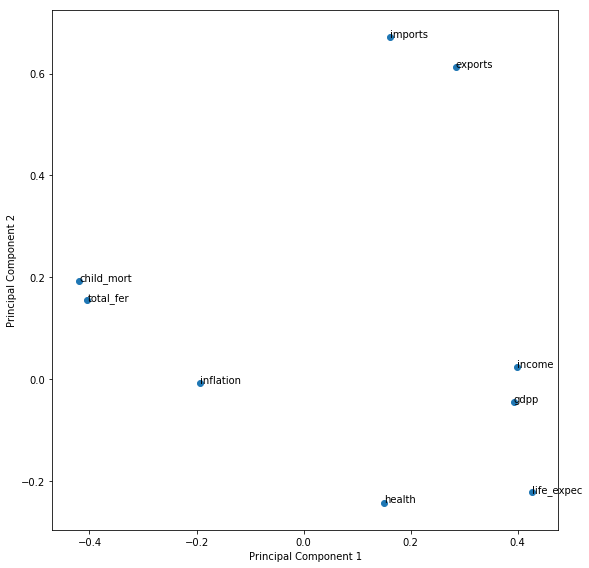

In [333]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

Looking at the screeplot to assess the number of needed principal components

In [334]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

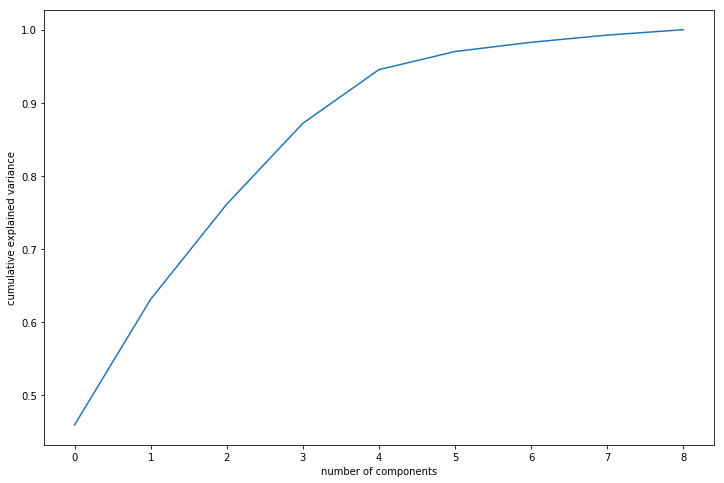

In [335]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [336]:
#from scree plot we can see that at k=4 ,95% data is being explained. total 5 components included

In [337]:
pca1 = PCA(svd_solver='randomized', random_state=50)
pca_final=pca1.fit_transform(country1_norm1)

In [338]:
pca_norm=pd.DataFrame(pca_final)

In [339]:
pca_norm.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']

In [340]:
pca_norm.shape

(167, 9)

In [341]:
pca_norm.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310  -0.254597    0.383000   
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677   0.084579    0.248919   
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475  -0.401696   -0.087214   
3   -2.932423  1.695555  1.525044  0.839625 -0.273209  -0.547996   -0.440835   
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007  -0.206919    0.241978   

   total_fer      gdpp  
0   0.415076 -0.014148  
1  -0.221042  0.173316  
2  -0.184162  0.084037  
3  -0.355998 -0.091339  
4  -0.023681  0.094270

In [342]:
pca_again = PCA(0.90)

In [343]:
country_pca2 = pca_again.fit_transform(country1_norm1)
df_train_pca2.shape
# we see that PCA selected 14 components

(167, 6)

In [344]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [345]:
#Basis transformation - getting the data onto our PCs
country_pca = pca_final.fit_transform(country)
country_pca.shape

(167, 5)

In [346]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(country_pca.transpose())

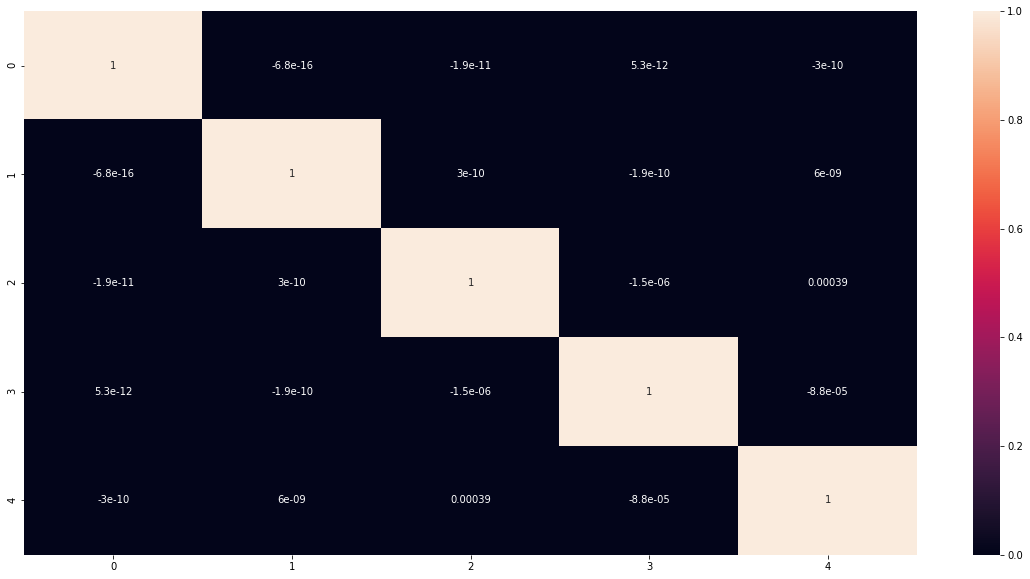

In [347]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [348]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0003945057109800334 , min corr:  -8.767368921150322e-05


In [349]:
u, s, vt = np.linalg.svd(country1, full_matrices=True)

In [350]:
print("u shape is :",u.shape)
print("s shape is :",s.shape)
print("vt shape is :",vt.shape)

u shape is : (167, 167)
s shape is : (9,)
vt shape is : (9, 9)


In [351]:
country1_norm1 = pd.DataFrame(country1_norm1)
country1_norm1.columns = country1.columns
country1_norm1.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

In [352]:
pca_again = PCA(0.95)

In [353]:
df_train_pca2 = pca_again.fit_transform(country1_norm1)
df_train_pca2.shape

(167, 6)

In [354]:
#hopkins statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [355]:
hopkins(country1_norm1)

0.8687012823864915

In [356]:
#K-Means with some K
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit_transform(pca_norm)

array([[ 1.09219074,  3.79785973,  5.69681163,  9.17680205, 10.02357604],
       [ 3.48379925,  0.83112277,  3.18233063, 10.48965876,  8.14659531],
       [ 3.09267802,  1.46231834,  3.72262481,  9.1659143 ,  8.48764047],
       [ 2.39838406,  4.39127558,  6.33347685,  7.98014015,  9.32989438],
       [ 3.69459893,  0.96790164,  2.68863392, 10.83650033,  7.17402287],
       [ 3.67485238,  2.18903442,  3.30373173,  8.98096169,  9.13493716],
       [ 3.30990844,  1.17506787,  3.75848768, 10.1090975 ,  8.56160329],
       [ 5.3503669 ,  3.51537347,  1.35090643, 11.41355532,  8.15105753],
       [ 5.4882558 ,  3.42514092,  0.83963605, 11.6687425 ,  6.71364812],
       [ 3.01214612,  1.54931479,  3.52755626,  9.36080952,  8.36124237],
       [ 3.83512119,  1.62053867,  1.81791221, 10.99418709,  7.54015819],
       [ 4.29168754,  2.01899033,  2.37006764, 10.54107942,  6.41882755],
       [ 2.76908297,  2.03929346,  4.4236741 ,  9.7794386 ,  9.50084229],
       [ 3.74838288,  1.16561684,  2.3

In [357]:
#Silhouette Analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k).fit(country1_norm1)
    sse_.append([k, silhouette_score(country1_norm1, kmeans.labels_)])

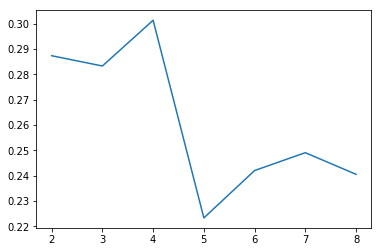

In [358]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

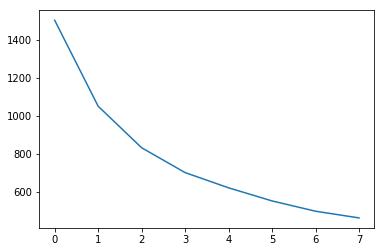

In [359]:
#Sum of Squared Distances
# sum of squared distances
ssd = []
for num_clusters in list(range(1,9)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country1_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [360]:
country1.index = pd.RangeIndex(len(country1.index))

In [361]:
country1_km = pd.concat([pca_norm, pd.Series(model_clus5.labels_)], axis=1)

In [362]:
final=pd.concat([name,country1_km],axis=1)


In [363]:
final.rename(columns={0:'cluster_ID'},inplace=True)

In [364]:
final.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan   -2.913025  0.095621 -0.718118  1.005255 -0.158310   
1              Albania    0.429911 -0.588156 -0.333486 -1.161059  0.174677   
2              Algeria   -0.285225 -0.455174  1.221505 -0.868115  0.156475   
3               Angola   -2.932423  1.695555  1.525044  0.839625 -0.273209   
4  Antigua and Barbuda    1.033576  0.136659 -0.225721 -0.847063 -0.193007   

   inflation  life_expec  total_fer      gdpp  cluster_ID  
0  -0.254597    0.383000   0.415076 -0.014148           0  
1   0.084579    0.248919  -0.221042  0.173316           1  
2  -0.401696   -0.087214  -0.184162  0.084037           1  
3  -0.547996   -0.440835  -0.355998 -0.091339           0  
4  -0.206919    0.241978  -0.023681  0.094270           1

In [365]:
final.to_csv("final_csv.csv")

In [366]:
#We can see lots of countries in 5 clusters.
#lets create 8 clusters so that amount will be distributed in poor countries will be high

In [367]:
#K-Means with some K
# Kmeans with K=8
model_clus8 = KMeans(n_clusters = 8, max_iter=50)
model_clus8.fit_transform(pca_norm)



country1_km_clus8 = pd.concat([pca_norm, pd.Series(model_clus8.labels_)], axis=1)

final_km_clus8=pd.concat([name,country1_km_clus8],axis=1)

final_km_clus8.rename(columns={0:'cluster_ID'},inplace=True)

In [368]:
final_km_clus8.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan   -2.913025  0.095621 -0.718118  1.005255 -0.158310   
1              Albania    0.429911 -0.588156 -0.333486 -1.161059  0.174677   
2              Algeria   -0.285225 -0.455174  1.221505 -0.868115  0.156475   
3               Angola   -2.932423  1.695555  1.525044  0.839625 -0.273209   
4  Antigua and Barbuda    1.033576  0.136659 -0.225721 -0.847063 -0.193007   

   inflation  life_expec  total_fer      gdpp  cluster_ID  
0  -0.254597    0.383000   0.415076 -0.014148           0  
1   0.084579    0.248919  -0.221042  0.173316           4  
2  -0.401696   -0.087214  -0.184162  0.084037           3  
3  -0.547996   -0.440835  -0.355998 -0.091339           0  
4  -0.206919    0.241978  -0.023681  0.094270           4

In [369]:
final_km_clus8.to_csv("final_km_clus8.csv")

In [370]:
country1.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [371]:
# analysis of clusters formed
country1.index = pd.RangeIndex(len(country1.index))
country1_km = pd.concat([country1, pd.Series(model_clus5.labels_)], axis=1)
country1_km.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'ClusterID']

km_clusters_child_mort = pd.DataFrame(country1_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(country1_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(country1_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(country1_km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(country1_km.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(country1_km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(country1_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(country1_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(country1_km.groupby(["ClusterID"]).gdpp.mean())

In [372]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort,km_clusters_exports,km_clusters_health,km_clusters_imports,
               km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", 'child_mort_mean', 'exports_mean', 'health_mean', 'imports_mean', 'income_mean', 'inflation_mean',
       'life_expec_mean', 'total_fer_mean', 'gdpp_mean']
df.head()

ClusterID  child_mort_mean  exports_mean  health_mean  imports_mean  \
0          0        90.243750     29.046229     6.368958     42.772206   
1          1        20.610465     41.770698     6.266628     48.189535   
2          2         4.982759     45.703448     9.245862     39.513793   
3          3       130.000000     25.300000     5.070000     17.400000   
4          4         4.133333    176.000000     6.793333    156.666667   

    income_mean  inflation_mean  life_expec_mean  total_fer_mean     gdpp_mean  
0   3867.562500        9.891146        59.370833        4.920625   1881.250000  
1  13408.953488        7.375360        73.220930        2.250116   7230.046512  
2  45762.068966        2.727793        80.386207        1.814828  44065.517241  
3   5150.000000      104.000000        60.500000        5.840000   2330.000000  
4  64033.333333        2.468000        81.433333        1.380000  57566.666667

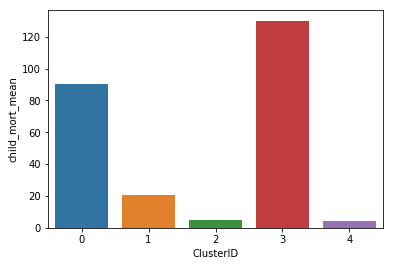

In [373]:
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)

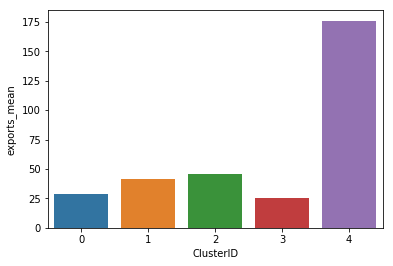

In [374]:
sns.barplot(x=df.ClusterID, y=df.exports_mean)

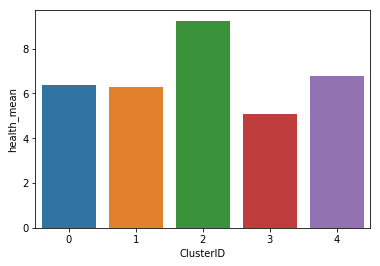

In [375]:
sns.barplot(x=df.ClusterID, y=df.health_mean)

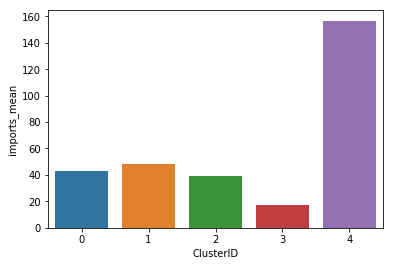

In [376]:
sns.barplot(x=df.ClusterID, y=df.imports_mean)

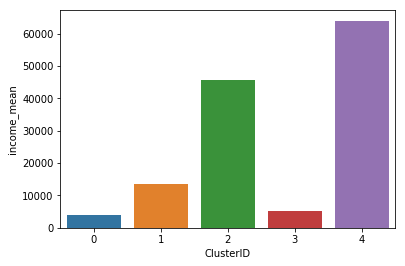

In [377]:
sns.barplot(x=df.ClusterID, y=df.income_mean)

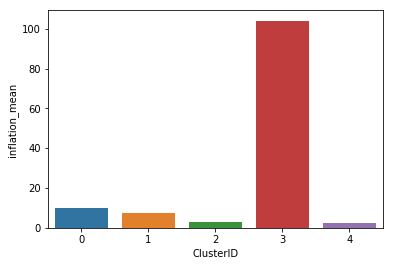

In [378]:
sns.barplot(x=df.ClusterID, y=df.inflation_mean)

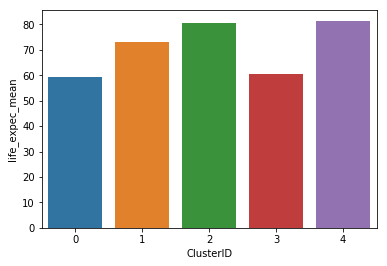

In [379]:
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

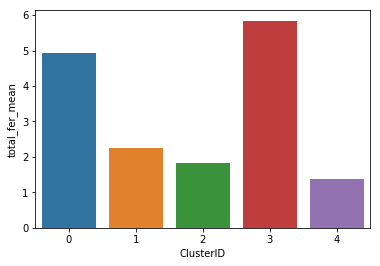

In [380]:
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

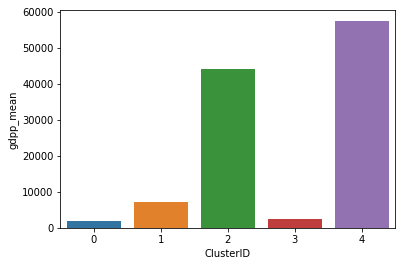

In [381]:
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

# Hierarchical Clustering

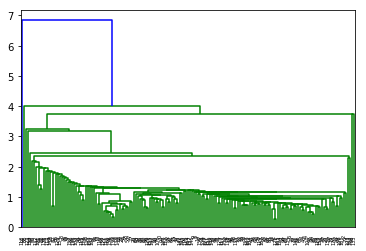

In [382]:
mergings = linkage(pca_norm, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

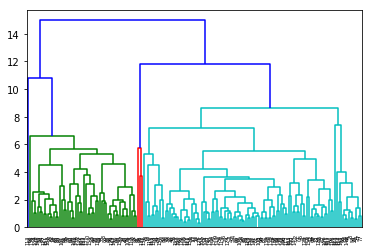

In [383]:
mergings = linkage(pca_norm, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [384]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
country1_hc = pd.concat([pca_norm, clusterCut], axis=1)
country1_hc.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'ClusterID']

In [385]:
country1_hc.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310  -0.254597    0.383000   
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677   0.084579    0.248919   
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475  -0.401696   -0.087214   
3   -2.932423  1.695555  1.525044  0.839625 -0.273209  -0.547996   -0.440835   
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007  -0.206919    0.241978   

   total_fer      gdpp  ClusterID  
0   0.415076 -0.014148          0  
1  -0.221042  0.173316          1  
2  -0.184162  0.084037          1  
3  -0.355998 -0.091339          0  
4  -0.023681  0.094270          1

In [386]:

final_hc_clus5=pd.concat([name,country1_hc],axis=1)


In [387]:
final_hc_clus5.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan   -2.913025  0.095621 -0.718118  1.005255 -0.158310   
1              Albania    0.429911 -0.588156 -0.333486 -1.161059  0.174677   
2              Algeria   -0.285225 -0.455174  1.221505 -0.868115  0.156475   
3               Angola   -2.932423  1.695555  1.525044  0.839625 -0.273209   
4  Antigua and Barbuda    1.033576  0.136659 -0.225721 -0.847063 -0.193007   

   inflation  life_expec  total_fer      gdpp  ClusterID  
0  -0.254597    0.383000   0.415076 -0.014148          0  
1   0.084579    0.248919  -0.221042  0.173316          1  
2  -0.401696   -0.087214  -0.184162  0.084037          1  
3  -0.547996   -0.440835  -0.355998 -0.091339          0  
4  -0.206919    0.241978  -0.023681  0.094270          1

In [388]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 8).reshape(-1,))
country1_hc = pd.concat([pca_norm, clusterCut], axis=1)
country1_hc.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'ClusterID']
	   
final_hc_clus8=pd.concat([name,country1_hc],axis=1)

In [389]:
final_hc_clus8.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan   -2.913025  0.095621 -0.718118  1.005255 -0.158310   
1              Albania    0.429911 -0.588156 -0.333486 -1.161059  0.174677   
2              Algeria   -0.285225 -0.455174  1.221505 -0.868115  0.156475   
3               Angola   -2.932423  1.695555  1.525044  0.839625 -0.273209   
4  Antigua and Barbuda    1.033576  0.136659 -0.225721 -0.847063 -0.193007   

   inflation  life_expec  total_fer      gdpp  ClusterID  
0  -0.254597    0.383000   0.415076 -0.014148          0  
1   0.084579    0.248919  -0.221042  0.173316          1  
2  -0.401696   -0.087214  -0.184162  0.084037          1  
3  -0.547996   -0.440835  -0.355998 -0.091339          0  
4  -0.206919    0.241978  -0.023681  0.094270          1

In [390]:
final_hc_clus8.to_csv("final_hc_clus8.csv")
final_hc_clus5.to_csv("final_hc_clus5.csv")

In [391]:
km_clusters_child_mort = pd.DataFrame(country1_hc.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(country1_hc.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(country1_hc.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(country1_hc.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(country1_hc.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(country1_hc.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(country1_hc.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(country1_hc.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(country1_hc.groupby(["ClusterID"]).gdpp.mean())

In [392]:

df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort,km_clusters_exports,km_clusters_health,km_clusters_imports,
               km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", 'child_mort_mean', 'exports_mean', 'health_mean', 'imports_mean', 'income_mean', 'inflation_mean',
       'life_expec_mean', 'total_fer_mean', 'gdpp_mean']
df.head()

ClusterID  child_mort_mean  exports_mean  health_mean  \
ClusterID                                                          
0                0.0        -1.981308      0.486214    -0.376033   
1                1.0         0.402584     -0.393943     0.037291   
2                2.0         2.790060     -1.414695    -0.296397   
3                3.0         2.147302      0.723941     1.065848   
4                4.0        -4.409717      1.742230    -1.462809   

           imports_mean  income_mean  inflation_mean  life_expec_mean  \
ClusterID                                                               
0              0.428109    -0.112983       -0.134442         0.034988   
1             -0.650659     0.103234        0.053429        -0.047301   
2              1.497163    -0.133148       -0.040789         0.060597   
3              0.289862    -0.356200       -0.032875        -0.031865   
4              1.793592    -0.900724        3.141738         0.423342   

           total_fer_mean  gdpp_mean  
ClusterID                             
0                0.096162  -0.020141  
1               -0.049071   0.009492  
2               -0.157412  -0.261924  
3                0.217326   0.227857  
4               -0.740812   0.221712

In [393]:
#validate data from Kmean and Hierarchical approvach

In [394]:
final.loc[final['cluster_ID']==4]

country  child_mort   exports    health   imports    income  \
91   Luxembourg    6.917755  4.849844  1.001837  3.129643 -0.281031   
98        Malta    3.679543  4.765486 -1.021313 -0.501107  1.617874   
133   Singapore    5.783376  6.682090  0.654420  0.089638  0.028843   

     inflation  life_expec  total_fer      gdpp  cluster_ID  
91    0.023934    0.401859  -0.308984 -0.846316           4  
98   -0.323486   -0.258599  -0.369100  0.192502           4  
133  -0.176651   -0.029151  -0.191773  0.453017           4

In [395]:
final_km_clus8.loc[final_km_clus8['cluster_ID']==3]

country  child_mort   exports    health   imports    income  \
2               Algeria   -0.285225 -0.455174  1.221505 -0.868115  0.156475   
5             Argentina    0.022407 -1.779187  0.869997 -0.036967  0.981057   
6               Armenia   -0.101584 -0.568252  0.242092 -1.466266 -0.055992   
9            Azerbaijan   -0.181487 -0.402866  0.867459 -0.438773  0.137350   
12           Bangladesh   -1.123851 -0.961397  0.526615 -1.197201 -0.669166   
19              Bolivia   -0.793852 -0.120261  0.400741 -0.724703 -0.224663   
22               Brazil    0.140781 -2.151077 -0.172635 -0.166920  0.298665   
34                China    0.057482 -1.189997  0.427315 -1.277179 -0.228828   
35             Colombia    0.121146 -1.768909 -0.245606 -0.715209 -0.095940   
45   Dominican Republic   -0.231103 -0.880641 -0.036736 -0.653433 -0.205497   
46              Ecuador    0.009618 -1.045221 -0.273292 -0.488514  0.371300   
47                Egypt   -0.848187 -0.819819  0.583290 -0.745231 -0.294916   
55                Gabon   -1.421715  0.319723  1.537533  0.187759 -0.527956   
62            Guatemala   -0.663503 -0.613911 -0.332674 -0.445317 -0.100508   
69                India   -1.342826 -0.535139  0.469946 -0.788294 -0.520251   
70            Indonesia   -0.954750 -0.732362  1.376011 -1.143688 -0.316046   
71                 Iran   -0.001065 -1.334350  1.022805 -0.754547  0.289116   
72                 Iraq   -1.029228 -0.283269  0.192227  0.564141  0.721712   
76              Jamaica    0.018609 -0.238961  0.333750 -1.222456  0.170524   
79           Kazakhstan   -0.293346 -0.237525  1.492426 -0.453078  0.219618   
84                  Lao   -1.527770  0.545787  0.137159 -0.415582 -0.319471   
103            Mongolia   -0.944976  0.529800  1.854419 -0.394166  2.235076   
105             Morocco   -0.232870 -0.281028 -0.261357 -1.076394 -0.500666   
107             Myanmar   -1.837198 -1.613669  1.009489 -1.123217 -1.365454   
109               Nepal   -1.307090 -0.789049  0.389811 -0.753699  0.305714   
119                Peru   -0.020635 -1.086617  0.404349 -1.069622 -0.368765   
120         Philippines   -0.782746 -0.096498  0.309094 -1.082358 -0.726077   
125              Russia    0.163762 -1.066678  1.090518 -0.644874 -0.019435   
127               Samoa   -0.562898 -0.022104 -0.638391 -0.532651 -0.222970   
140           Sri Lanka   -0.575572 -0.997551  1.752241 -1.378030  0.465925   
146          Tajikistan   -1.244464 -0.028917 -0.148159 -0.481046  0.423065   
151               Tonga   -0.755009 -0.087894 -0.423288 -0.854637 -0.284342   
153              Turkey    0.401438 -1.411990  0.225685 -0.563295 -0.079943   
160             Uruguay    0.617313 -1.430477 -0.244437 -0.358718  0.113286   
161          Uzbekistan   -0.853529 -0.654485  0.619885 -0.722183  0.508212   
162             Vanuatu   -0.820631  0.639570 -0.389923 -0.706595 -0.395748   
163           Venezuela   -0.551036 -1.233886  3.101350 -0.115311  2.082581   
165               Yemen   -1.887451 -0.109453  1.109752  0.056257  0.618365   

     inflation  life_expec  total_fer      gdpp  cluster_ID  
2    -0.401696   -0.087214  -0.184162  0.084037           3  
5    -0.003596   -0.150832   0.125950  0.126079           3  
6     0.282469    0.546907  -0.168164 -0.065629           3  
9     0.637836   -0.963776  -0.063190 -0.035275           3  
12    0.312502    0.058975  -0.446637 -0.079200           3  
19   -0.246081   -0.334992  -0.255441 -0.036131           3  
22    0.327505   -0.282291  -0.026057  0.048558           3  
34    0.269798   -0.184294  -0.144219 -0.084202           3  
35   -0.017809   -0.258046  -0.130999  0.116197           3  
45   -0.137202    0.053555  -0.227678  0.181305           3  
46   -0.363661   -0.246101  -0.154075  0.189385           3  
47   -0.155549    0.083117   0.188912 -0.046866           3  
55    0.109916   -0.835410   0.177060 -0.325442           3  
62   -0.346136   -0.064148   0.061831  0.041179           3  
69  

In [396]:
final_hc_clus8.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan   -2.913025  0.095621 -0.718118  1.005255 -0.158310   
1              Albania    0.429911 -0.588156 -0.333486 -1.161059  0.174677   
2              Algeria   -0.285225 -0.455174  1.221505 -0.868115  0.156475   
3               Angola   -2.932423  1.695555  1.525044  0.839625 -0.273209   
4  Antigua and Barbuda    1.033576  0.136659 -0.225721 -0.847063 -0.193007   

   inflation  life_expec  total_fer      gdpp  ClusterID  
0  -0.254597    0.383000   0.415076 -0.014148          0  
1   0.084579    0.248919  -0.221042  0.173316          1  
2  -0.401696   -0.087214  -0.184162  0.084037          1  
3  -0.547996   -0.440835  -0.355998 -0.091339          0  
4  -0.206919    0.241978  -0.023681  0.094270          1

In [397]:
#Outlier treatment

in final_km_clus8 we can see cluster 1,5,6 countries mostly need help
in this dataframe, cluster 5 has Nigeria, 
Cluster 6 has countries where export, health,income,inflation is low, high child mortality,life expected within 30-60, gdp is medium
cluster 1 has very high child mortality rate, investment in health is low, total_fer rate is less



For better filtering I did clustering using hierarchical method of k=8 and tried to match countries between both method (K-Mean and hierarchical)
final_hc_clus8 dataframe consist below result 
CLuster 0 countries consist mostly low gdpp, low income, child mortality rate is very high, investment in health is low,inflation, total_fertility is low 
cluster 4 consist Haiti and cluster 6 consist Nigeria 

I can see below countries don't need and removed from list submitted to CEO. These countries have income and gdpp is too high. I removed post performing outlier analysis.
Equatorial Guinea
South Africa
Botswana


We can also see when GDPP is high, income is also high most of the times. By doing outlier analysis, I removed countries where gdpp is more than 1000.

I can see below country need help 
country
Senegal
Chad
Comoros
Benin
Mali
Tanzania
Haiti
Guinea
Uganda
Burkina Faso
Rwanda
Gambia
Afghanistan
Guinea-Bissau
Togo
Malawi
Central African Republic
Mozambique
Madagascar
Sierra Leone
Niger
Congo, Dem. Rep.
Liberia
Burundi
Nigeria
